## **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**

Deteksi outlier menggunakan metode K-Nearest Neighbors (KNN) merupakan salah satu teknik yang digunakan untuk mengidentifikasi data yang menyimpang dari pola mayoritas. KNN bekerja dengan cara mengukur jarak antara satu data dengan data lainnya dalam dataset. Jika sebuah data memiliki jarak yang jauh dari tetangga terdekatnya, maka data tersebut berpotensi sebagai outlier. Metode ini sangat berguna pada tahap Data Understanding karena dapat membantu menemukan data ekstrem yang mungkin mempengaruhi hasil analisis atau pemodelan.

**Langkah-Langkah Deteksi Outlier dengan KNN:**
- Menentukan Nilai k

Langkah pertama adalah menentukan jumlah tetangga terdekat (k) yang akan digunakan untuk menghitung jarak. Nilai k ini bisa ditentukan berdasarkan eksperimen, dengan angka umum berkisar antara 5 hingga 20.

- Menghitung Jarak Antar Data

Selanjutnya, dilakukan perhitungan jarak antara setiap data dengan data lainnya menggunakan rumus jarak seperti Euclidean Distance atau Manhattan Distance, tergantung pada karakteristik data.

- Mencari k Tetangga Terdekat

Setelah jarak dihitung, dipilih k data terdekat untuk setiap titik data.

- Menghitung Skor Outlier
Skor outlier dihitung dengan cara menghitung rata-rata jarak antara sebuah data dengan k tetangganya. Semakin besar rata-rata jarak ini, semakin besar pula kemungkinan data tersebut merupakan outlier.

- Menentukan Outlier Terakhir
ditentukan ambang batas (threshold) untuk memisahkan mana data yang dianggap normal dan mana yang termasuk outlier berdasarkan skor yang diperoleh.

### **kesimpulan**
Metode KNN untuk deteksi outlier sangat berguna dalam data understanding, terutama ketika data memiliki pola distribusi yang tidak diketahui sebelumnya. Dengan membandingkan jarak ke tetangga terdekat, metode ini dapat mengidentifikasi titik yang menyimpang secara signifikan dari kelompok data lainnya.

kode di bawah ini adalah Perintah %pip install pymysql digunakan untuk menginstal pustaka PyMySQL, yang berfungsi sebagai konektor antara Python dan database MySQL. Dengan pustaka ini, pengguna dapat menjalankan perintah SQL seperti INSERT, SELECT, UPDATE, DELETE, dan mengelola database langsung dari skrip Python.

Sementara itu, perintah %pip install psycopg2 digunakan untuk menginstal pustaka psycopg2, yang merupakan driver utama untuk berkomunikasi dengan database PostgreSQL. Pustaka ini memungkinkan pengguna untuk menghubungkan Python ke PostgreSQL, menjalankan query, dan mengelola data dengan mudah.

Kedua pustaka ini sangat berguna dalam pengembangan aplikasi berbasis database, baik untuk kebutuhan analisis data, pengelolaan transaksi, maupun pengembangan web yang menggunakan MySQL atau PostgreSQL sebagai sistem manajemen basis data (DBMS).

In [17]:
%pip install pymysql
%pip install psycopg2

Kode di bawah ini melakukan deteksi outlier pada dataset Iris yang tersimpan dalam database PostgreSQL dan MySQL menggunakan metode K-Nearest Neighbors (KNN). Data dari kedua database diambil dan digabungkan berdasarkan kolom "id" dan "class". Setelah itu, fitur numerik ("petal_length", "petal_width", "sepal_length", dan "sepal_width") digunakan untuk menghitung jarak ke 5 tetangga terdekat (k=5).

Hasil perhitungan jarak rata-rata digunakan untuk menentukan apakah suatu data termasuk outlier, dengan membandingkan nilainya terhadap threshold yang dihitung dari rata-rata jarak ditambah 2 standar deviasi. Data yang memiliki nilai lebih besar dari threshold akan dikategorikan sebagai outlier.

Setelah proses deteksi selesai, hasilnya ditampilkan dalam bentuk tabel yang menunjukkan id, class, fitur numerik, nilai KNN distance, dan status outlier. Selain itu, jumlah total outlier dihitung dan ditampilkan secara terpisah.

Agar lebih mudah dipahami, hasil deteksi outlier juga divisualisasikan dalam bentuk scatter plot menggunakan Seaborn. Plot pertama menunjukkan hubungan antara "sepal_length" dan "sepal_width", sedangkan plot kedua memperlihatkan hubungan antara "petal_length" dan "petal_width", dengan outlier diberi warna merah untuk membedakannya dari data normal.

Dengan metode ini, outlier dapat terdeteksi berdasarkan pola kedekatan antar data, sehingga memudahkan dalam memahami penyebaran data dan mengidentifikasi anomali dalam dataset.

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier_knn
  1     Iris-setosa           1.4          0.2           5.1          3.5      4.007493        False
  2     Iris-setosa           1.4          0.2           4.9          3.0      4.031129        False
  3     Iris-setosa           1.3          0.2           4.7          3.2      4.207137        False
  4     Iris-setosa           1.5          0.2           4.6          3.1      4.062019        False
  5     Iris-setosa           1.4          0.2           5.0          3.6      4.060788        False
  6     Iris-setosa           1.7          0.4           5.4          3.9      3.674235        False
  7     Iris-setosa           1.4          0.3           4.6          3.4      4.170132        False
  8     Iris-setosa           1.5          0.2           5.0          3.4      3.964846        False
 10     Iris-setosa           1.5          0.1           4.9          3.1      3.987480    

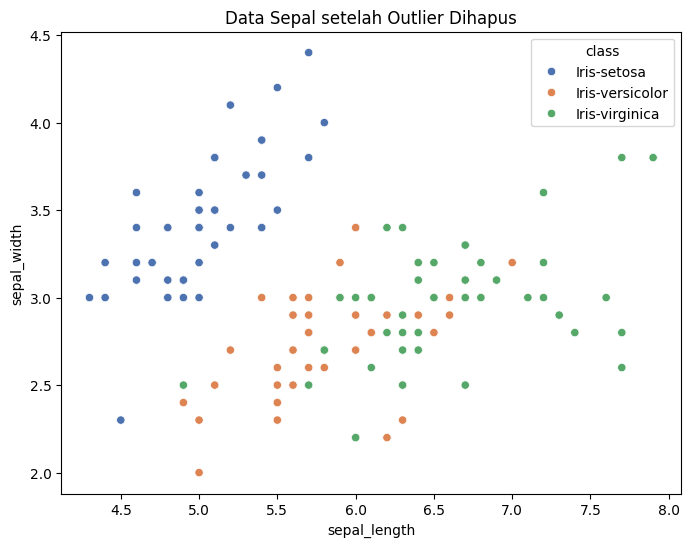

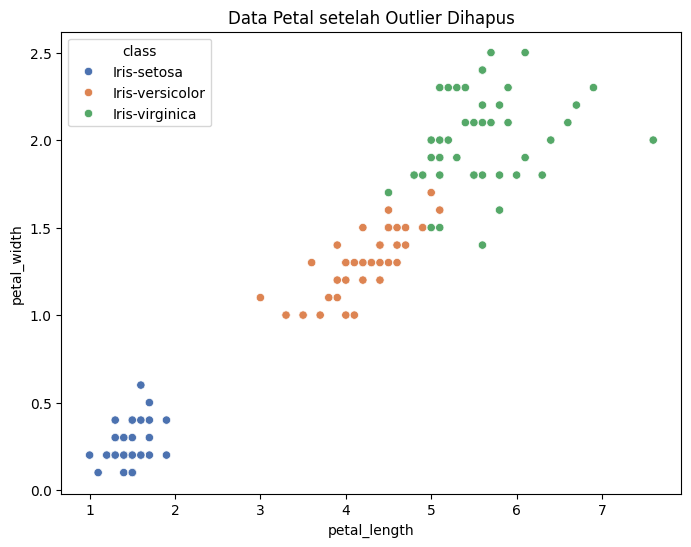

In [18]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1d952496-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_n1Ru1Ddse4sg_Gpi7Nb",
        database="defaultdb",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_b")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-e89c328-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GBbKfVRE1qvWkI6gU2s",
        database="iris_mysql",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_a")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

    # Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# KNN Outlier Detection
def knn_outlier_detection(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    avg_distances = distances[:, -1]  # Ambil jarak k-terjauh sebagai skor
    return avg_distances

# Hitung K-NN distance
df_merged["knn_distance"] = knn_outlier_detection(data_values, k=90)

# Tentukan threshold sebagai nilai rata-rata + 2 standar deviasi
threshold = df_merged["knn_distance"].mean() + 2 * df_merged["knn_distance"].std()
df_merged["outlier_knn"] = df_merged["knn_distance"] > threshold

# Hapus data outlier
df_filtered = df_merged[~df_merged["outlier_knn"]]

# Cetak hasil setelah outlier dihapus
print(df_filtered.to_string(index=False))
print(f"\nJumlah data setelah outlier dihapus: {len(df_filtered)}")

# Visualisasi setelah outlier dihapus
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["sepal_length"], y=df_filtered["sepal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Sepal setelah Outlier Dihapus")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_filtered["petal_length"], y=df_filtered["petal_width"],
    hue=df_filtered["class"], palette="deep"
)
plt.title("Data Petal setelah Outlier Dihapus")
plt.show()



### Pemisah Outlier dari data

Kode dibawah digunakan untuk mendeteksi outlier dalam dataset yang diperoleh dari dua database berbeda, yaitu PostgreSQL dan MySQL. Pertama, program menghubungkan ke masing-masing database menggunakan psycopg2 dan pymysql, lalu mengambil data dari tabel tabel_b di PostgreSQL dan tabel_a di MySQL. Data yang diperoleh kemudian dikonversi menjadi dataframe pandas dan digabungkan berdasarkan kolom "id" dan "class" menggunakan metode inner join, sehingga hanya data yang memiliki kesamaan pada kedua kolom tersebut yang disertakan dalam hasil akhir.

Selanjutnya, dari data yang telah digabungkan, hanya empat fitur numerik yaitu "petal_length", "petal_width", "sepal_length", dan "sepal_width" yang digunakan untuk analisis. Data ini diekstrak dalam bentuk array dan kemudian diproses menggunakan Local Outlier Factor (LOF) dengan parameter n_neighbors=90 untuk mendeteksi outlier. Model LOF memberikan label 1 untuk data normal dan -1 untuk data yang dianggap sebagai outlier, lalu hasilnya ditambahkan sebagai kolom baru dalam dataframe.

Setelah proses deteksi selesai, program mencetak seluruh data dengan label outlier, jumlah total outlier yang terdeteksi, serta data yang dianggap normal setelah menghapus outlier. Data yang tidak termasuk outlier disimpan dalam dataframe baru dengan kolom "outlier_label" dihapus, sehingga hanya menyisakan informasi yang relevan. Akhirnya, program menampilkan jumlah total data setelah penghapusan outlier dan mencetak seluruh data yang dianggap normal untuk dianalisis lebih lanjut.

In [20]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1d952496-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_n1Ru1Ddse4sg_Gpi7Nb",
        database="defaultdb",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_b")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-e89c328-dinaaa-269a.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_GBbKfVRE1qvWkI6gU2s",
        database="iris_mysql",
        port=27730
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel_a")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa           1.4          0.2           4.9          3.0              1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa          60.0         43.0          40.0         57.0             -1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

### Menghitung akurasi data

Kode ini bertujuan untuk melakukan deteksi outlier menggunakan Local Outlier Factor (LOF), kemudian melatih model K-Nearest Neighbors (KNN) dengan dan tanpa outlier untuk membandingkan akurasinya.

Pertama, kode mengambil fitur yang digunakan untuk analisis dari dataframe yang telah digabungkan sebelumnya (df_merged). Kolom "class" digunakan sebagai label target, lalu diubah menjadi format numerik menggunakan LabelEncoder().

Selanjutnya, LOF diterapkan dengan n_neighbors=90 dan contamination=0.1 untuk mendeteksi data yang dianggap sebagai outlier. Data yang memiliki label outlier (-1) dipisahkan, sehingga terbentuk dua dataset: satu dengan outlier (df_merged) dan satu tanpa outlier (df_cleaned).

Setelah itu, data dibagi menjadi training set (80%) dan testing set (20%) menggunakan train_test_split(). Pembagian ini dilakukan dua kali, yaitu untuk dataset yang masih mengandung outlier (X_train_all, X_test_all, y_train_all, y_test_all) dan dataset yang telah dibersihkan dari outlier (X_train_clean, X_test_clean, y_train_clean, y_test_clean).

Untuk membangun model, digunakan pipeline yang terdiri dari StandardScaler() untuk normalisasi data dan KNeighborsClassifier(n_neighbors=11) sebagai model klasifikasi. Model KNN pertama kali dilatih menggunakan dataset yang masih mengandung outlier, kemudian dievaluasi menggunakan accuracy_score() dan classification_report(). Hasil akurasi dan laporan klasifikasi ditampilkan untuk melihat performa model.

Selanjutnya, model KNN dilatih ulang menggunakan dataset yang sudah dibersihkan dari outlier, dan dilakukan evaluasi dengan cara yang sama. Akurasi dan laporan klasifikasi setelah pembersihan outlier juga ditampilkan untuk melihat apakah model memiliki performa yang lebih baik setelah outlier dihilangkan.

In [22]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 0.9
                 precision    recall  f1-score   support

    Iris-setosa       0.77      1.00      0.87        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           0.90        30
      macro avg       0.92      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30

Akurasi tanpa outlier: 0.9629629629629629
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.96        27
      macro avg       0.96      0.96      0.96        27
   weighted avg       0.97      0.96      0.96        27

